# Australia Shark Attacks Analysis
&emsp;This analysis based on a dataset provided by [Mysar Ahmad Bhat](https://www.kaggle.com/datasets/mysarahmadbhat/shark-attacks). It focuses on the records in Australia that happened from 1900 to 2017. The dataset has been preliminarily cleaned using Excel. Missing values were treated.

1. [Import Libraries](#libraries)
2. [Data Import](#import)
3. [Exploratory Data Analysis](#eda)

## Import Libraries<a id='libraries'></a>

In [2]:
# Array and dataframe 
import numpy as np
import pandas as pd

# Visualisation tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('fivethirtyeight')
sns.set_theme(style="whitegrid")

## Data Import<a id='import'></a>

In [3]:
# Dataset Import
df = pd.read_csv("attacks_ready.csv", encoding='cp1252')
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")
df

Number of rows: 1138
Number of columns: 12


,Case,Date,Year,Type,Area,Location,Activity,Sex,Age,Fatal,Time,Species
0,2017.06.11,11/06/2017,2017,Unprovoked,Western Australia,"Point Casuarina, Bunbury",Body boarding,M,48,N,08h30,"White shark, 4 m"
1,2017.06.10.b,10/06/2017,2017,Unprovoked,Victoria,"Flinders, Mornington Penisula",Surfing,F,unknown,N,15h45,7 gill shark
2,2017.05.27,27/05/2017,2017,unknown,New South Wales,Evans Head,Fishing,M,73,N,unknown,unknown
3,2017.05.06.R,6/05/2017,2017,Provoked,Queensland,Weipa,Attempting to lasso a shark,M,29,N,unknown,9' shark
4,2017.04.17.a,17/04/2017,2017,Unprovoked,Western Australia,Kelpies near Wylie Bay,Surfing,F,17,Y,16h00,White shark
...,...,...,...,...,...,...,...,...,...,...,...,...
1133,1901.12.01,1/12/2001,1901,Unprovoked,Queensland,Brisbane,Bathing,M,10,N,unknown,unknown
1134,1901.01.30,30/01/2001,1901,Unprovoked,Queensland,Brisbane,Bathing,M,unknown,Y,unknown,unknown
1135,1900.12.27,27/12/2000,1900,Unprovoked,New South Wales,"Middle Harbour, Sydney",Bathing,M,unknown,Y,unknown,unknown
1136,1900.09.15,15/09/2000,1900,Unprovoked,Queensland,Townsville,Swimming,M,unknown,N,unknown,unknown


In [4]:
# Data types
df.dtypes

Case        object
Date        object
Year         int64
Type        object
Area        object
Location    object
Activity    object
Sex         object
Age         object
Fatal       object
Time        object
Species     object
dtype: object

In [5]:
# Create a new column Month
df['Month'] = df['Date'].str.split("/").str[1]
# Drop rows without a valid month
df = df[~df['Month'].isna()]
# Convert month into integers
df['Month'] = df['Month'].astype(int)

/var/folders/_6/8qgcbw5x5cqgmt_5s5b28mpw0000gn/T/ipykernel_3320/1411257362.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Month'].astype(int)


In [6]:
# Convert Time into two columns: time_hr and time_cat
df['Time'].unique()

array(['08h30', '15h45', 'unknown', '16h00', 'Afternoon', '18h30',
       'Morning', '10h20', '12h00', '13h30', '18h00', '09h30', '02h00',
       '09h00', '11h00', '07h30', '10h30', '9h00', 'Late afternoon',
       'After noon', '22h00', '11h30', '19h00', 'Midnight', '12h30',
       '13h20', '07h00', '18h15', '16h50', '06h15', '17h10', '06h00',
       '10h00', '15h00', '09h45', '06h45', '05h00', '13h45',
       'Sometime between 06h00 & 08hoo', '06h30', '17h20', '10h45',
       '17h01', '17h00', '08h20', '14h00', '10h55', '12h45', '16h45',
       '14h50', '15h30', '14h40', '09h05', '07h15', '14h30', '05h50',
       '20h00', '05h45', '13h25', '08h10', '13h26', '19h30', '17h45',
       '13h00', '18h20', '10h40', 'Night', '08h05', '08h00', '16h30',
       '08h45', '18h45', 'Early morning', '07h45', '10h15',
       'Before 07h00', '09h20', '20h30', '14h20', 'Sunset', '12h15',
       '17h15', '12h05', 'Dusk', '16h10', '23h00', '06h10', '15h15',
       '14h10', '11h05', 'Midday', '17h30', '0

In [7]:
def category_to_time(cat):
    '''
    Convert original time into hours.
    ----
    cat (str): original time
    ----
    Return: hours (int)
    '''
    if cat == '9h00':
        return 9
    elif cat == 'unknown':
        return 999
    elif cat == 'Sometime between 06h00 & 08hoo':
        return 7
    elif cat == 'Before 07h00':
        return 6
    elif cat == '09h00 -10h00':
        return 9
    elif cat == '20h45 (Sunset)':
        return 20
    elif cat == 'P.M.':
        return 17
    elif cat == '11h00 / 11h30':
        return 11
    elif cat == 'Daytime':
        return 12
    elif cat == 'A.M.':
        return 7
    elif cat == '"After dark"':
        return 19
    elif cat == "After 04h00":
        return 4
    
    elif cat == 'Midnight':
        return 0
    elif cat == 'Dawn':
        return 5
    elif cat == 'Early morning':
        return 6
    elif cat == 'Morning':
        return 8
    elif cat == 'Midday':
        return 12
    elif cat in ['Afternoon', 'After noon']:
        return 14
    elif cat in ['Late afternoon', 'Late afternon']:
        return 16
    elif cat in ['Dusk', 'Sunset']:
        return 17
    elif cat == 'Nightfall':
        return 18
    elif cat == 'Evening':
        return 19
    elif cat == 'Night':
        return 21
    elif cat == 'Late night':
        return 23
    else:
        return int(cat[:2])

In [8]:
df['time_hr'] = df['Time'].apply(category_to_time)
df['time_hr'].replace(999, np.nan, inplace=True)
df['time_hr'].unique()

/var/folders/_6/8qgcbw5x5cqgmt_5s5b28mpw0000gn/T/ipykernel_3320/1373271689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_hr'] = df['Time'].apply(category_to_time)
/var/folders/_6/8qgcbw5x5cqgmt_5s5b28mpw0000gn/T/ipykernel_3320/1373271689.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the orig

array([ 8., 15., nan, 16., 14., 18., 10., 12., 13.,  9.,  2., 11.,  7.,
       22., 19.,  0.,  6., 17.,  5., 20., 21., 23.,  4.,  1.,  3.])

In [9]:
time_cat = ['Midnight', 'Dawn', 'Early morning', 'Morning', 'Midday', 'Afternoon', 'Late afternoon', 'Dusk', 'Nightfall', 'Evening', 'Night', 'Late night']
time_hr = [i for i in range(24)]

def time_to_category(time):
    '''
    Convert hours into categories.
    ----
    time (int): hours of the day
    ----
    Return: Time categories (str)
    '''
    if 0 <= time < 4:
        return 'Midnight'
    elif 4 <= time < 6:
        return 'Dawn'
    elif 6 <= time < 8:
        return 'Early morning'
    elif 8 <= time < 11:
        return 'Morning'
    elif 11 <= time < 13:
        return 'Midday'
    elif 13 <= time < 15:
        return 'Afternoon'
    elif 15 <= time < 17:
        return 'Late afternoon'
    elif 17 <= time < 18:
        return 'Dusk'
    elif 18 <= time < 19:
        return 'Nightfall'
    elif 19 <= time < 20:
        return 'Evening'
    elif 20 <= time < 22:
        return 'Night'
    elif 22 <= time < 24:
        return 'Late night'
    else:
        return np.nan

In [10]:
df['time_cat'] = df['time_hr'].apply(time_to_category)
df['time_cat'].replace(np.nan, np.nan, inplace=True)
df['time_cat'].unique()

/var/folders/_6/8qgcbw5x5cqgmt_5s5b28mpw0000gn/T/ipykernel_3320/4278440140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_cat'] = df['time_hr'].apply(time_to_category)
/var/folders/_6/8qgcbw5x5cqgmt_5s5b28mpw0000gn/T/ipykernel_3320/4278440140.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the 

array(['Morning', 'Late afternoon', nan, 'Afternoon', 'Nightfall',
       'Midday', 'Midnight', 'Early morning', 'Late night', 'Evening',
       'Dusk', 'Dawn', 'Night'], dtype=object)

In [11]:
# Change "Species " into "Species"
df['Species'] = df['Species ']
# Remove unnecessary Date column and rearrange columns
df = df[['Case', 'Year', 'Month', 'time_hr', 'time_cat', 'Type', 'Activity', 'Area', 'Location', 'Sex', 'Age', 'Fatal', 'Species']]
df.head(3)

/var/folders/_6/8qgcbw5x5cqgmt_5s5b28mpw0000gn/T/ipykernel_3320/1947751443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Species'] = df['Species ']


,Case,Year,Month,time_hr,time_cat,Type,Activity,Area,Location,Sex,Age,Fatal,Species
0,2017.06.11,2017,6,8.0,Morning,Unprovoked,Body boarding,Western Australia,"Point Casuarina, Bunbury",M,48,N,"White shark, 4 m"
1,2017.06.10.b,2017,6,15.0,Late afternoon,Unprovoked,Surfing,Victoria,"Flinders, Mornington Penisula",F,unknown,N,7 gill shark
2,2017.05.27,2017,5,NaN,NaN,unknown,Fishing,New South Wales,Evans Head,M,73,N,unknown


## Exploratory Data Analysis<a id='eda'></a>
&emsp;After cleaning, exploratory data analysis will be conducted to reveal insights from the data using different columns.

### Year

In [12]:
year_count = df.groupby('Year').agg(len).iloc[:,0]
year_count

Year
1900     3
1901     2
1902     3
1903     4
1904     1
        ..
2013    19
2014    29
2015    31
2016    32
2017    14
Name: Case, Length: 118, dtype: int64

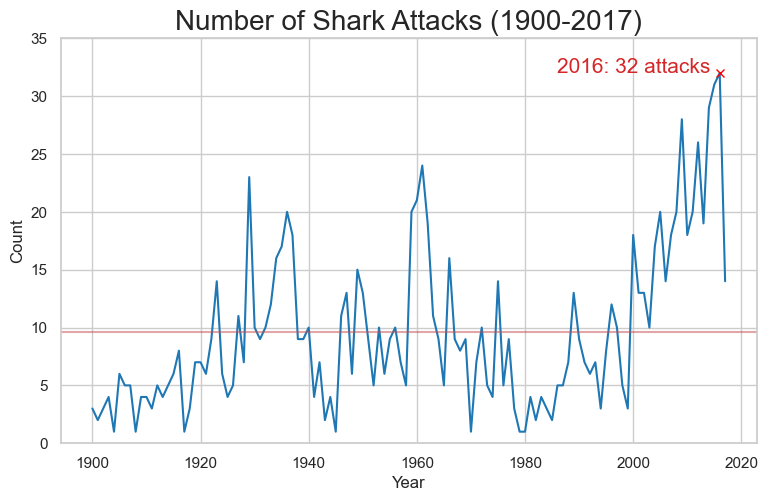

In [13]:
fig, ax = plt.subplots(figsize=(8,5))
# Line plot, average line, and maximum point
sns.lineplot(x=year_count.index, y=year_count.values, markers="o", color='tab:blue')
ax.axhline(year_count.mean(), c='r', alpha=.5)
ax.plot(year_count[year_count==year_count.max()].index[0], year_count.max(), marker='x', color='red')
ax.annotate(f"{year_count[year_count==year_count.max()].index[0]}: {year_count.max()} attacks", 
            (year_count[year_count==year_count.max()].index[0]-30, year_count.max()), 
            color="tab:red", size=15)
# Axes labels and title
plt.title("Number of Shark Attacks (1900-2017)", size=20)
plt.ylabel("Count")
plt.ylim([0,35])
# Display
plt.show()

* The `average` number of shark attack records for the years from 1900 to 2017 is almost `10 per year`. 
* However starting from 2000, the numbers of recorded attacks are `all` above the average. 
* Additionally, the numbers have been `increasing since 2000`.
* In `2016`, there were `32` attacks in total, `more than 2 attacks per month` in average.

### Month

In [14]:
month_count = df['Month'].value_counts(dropna=False).sort_index()
month_count

Month
1     181
2     133
3     114
4     102
5      51
6      59
7      42
8      48
9      50
10     83
11    112
12    160
Name: count, dtype: int64

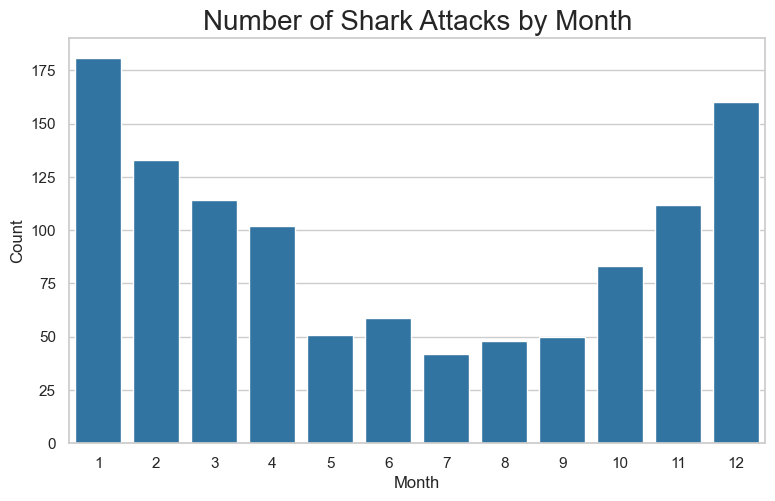

In [15]:
fig, ax = plt.subplots(figsize=(8,5))
# Bar plot
sns.barplot(x=month_count.index, y=month_count.values, color='tab:blue')
# Axes labels and title
plt.title("Number of Shark Attacks by Month", size=20)
plt.ylabel("Count")
# Display
plt.show()

* The visualisation shows a reaonsable trend where there were `more attacks recorded during Summer` in Australia.

### Time

In [16]:
hr_count = df['time_hr'].value_counts().sort_index()
hr_count

time_hr
0.0      1
1.0      1
2.0      2
3.0      1
4.0      3
5.0      7
6.0     21
7.0     30
8.0     41
9.0     32
10.0    30
11.0    39
12.0    39
13.0    26
14.0    66
15.0    39
16.0    51
17.0    41
18.0    26
19.0    15
20.0     9
21.0    16
22.0     2
23.0     2
Name: count, dtype: int64

* Most attacks recorded were in the `day`.
* Around `2PM`, there were the most attacks recorded.
* Note: It is worth mentioning that the plot does not directly indicate the probability of getting attacked at particular time of the day.

In [17]:
time_cat = df['time_cat'].value_counts()
time_cat

time_cat
Morning           103
Afternoon          92
Late afternoon     90
Midday             78
Early morning      51
Dusk               41
Nightfall          26
Night              25
Evening            15
Dawn               10
Midnight            5
Late night          4
Name: count, dtype: int64

In [18]:
# The correct order of categories
cat_order = ['Midnight', 'Dawn', 'Early morning', 'Morning', 'Midday', 'Afternoon', 'Late afternoon', 'Dusk', 'Nightfall', 'Evening', 'Night', 'Late night']
sorted_count = [] # List to store sorted values
for cat in cat_order: # Iterate from the correct order
    for cat2 in time_cat.index: # Search and match the correct value
        if cat==cat2:
            sorted_count.append(time_cat[cat2]) # Append value into the sorted list
cat_count = pd.Series(sorted_count, cat_order) # Combine sorted categories and values
cat_count

Midnight            5
Dawn               10
Early morning      51
Morning           103
Midday             78
Afternoon          92
Late afternoon     90
Dusk               41
Nightfall          26
Evening            15
Night              25
Late night          4
dtype: int64

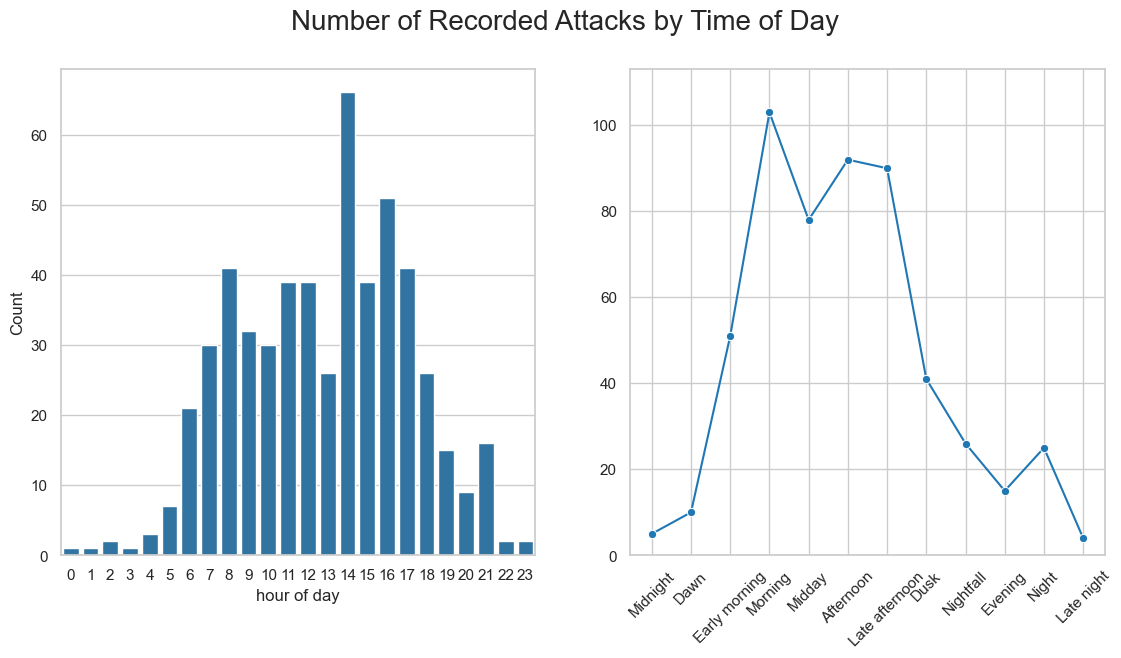

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
# Bar plot
sns.barplot(x=hr_count.index, y=hr_count.values, color='tab:blue', ax=ax[0])
# Ticks
ax[0].set(xticks=[i for i in range(24)], xticklabels=[i for i in range(24)], ylabel='Count', xlabel='hour of day')

# Line plot
sns.lineplot(x=cat_count.index, y=cat_count.values, markers="o", color='tab:blue', marker='o', ax=ax[1])
# y axis limit, axes labels, and tick labels
ax[1].set_ylim((0,cat_count.max()+10))
ax[1].set_xticks(cat_order)
ax[1].set_xticklabels(labels=cat_order, rotation=45)
ax[1].set_xlabel("")
# Title
plt.suptitle("Number of Recorded Attacks by Time of Day", size=20)
# Display
plt.show()

In [20]:
# To combine two plots
cat_hr = [1.5, 5, 7, 9.5, 12, 14, 16, 17.5, 18.5, 19.5, 21, 23]
cat_hr_count = pd.Series(sorted_count, cat_hr) # Combine sorted categories and values
cat_hr_count

1.5       5
5.0      10
7.0      51
9.5     103
12.0     78
14.0     92
16.0     90
17.5     41
18.5     26
19.5     15
21.0     25
23.0      4
dtype: int64

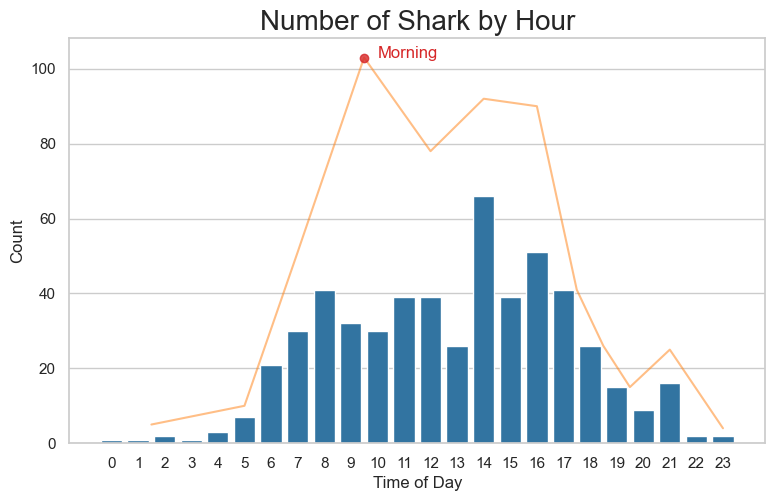

In [21]:
fig, ax = plt.subplots(figsize=(8,5))
# Bar plot, line plot, annotate maximum point on line
sns.barplot(x=hr_count.index, y=hr_count.values, color='tab:blue')
sns.lineplot(x=cat_hr, y=cat_count.values, markers="o", color='tab:orange', alpha=.5)
ax.plot(9.5, cat_hr_count.max(), marker="o", color='tab:red', alpha=.8)
ax.annotate("Morning", xy=(10, cat_hr_count.max()), color='tab:red')
# Axes labels and title
plt.title("Number of Shark by Hour", size=20)
plt.xlabel("Time of Day")
plt.ylabel("Count")
# Ticks
ax.set(xticks=[i for i in range(24)], xticklabels=[i for i in range(24)])
# Display
plt.show()

* Two types of time produce similar results.
* Categorical time shows that `morning` has the most attack records.
* Time by hour shows that `2PM` has the most attack records.

### Type

In [22]:
type_count = df['Type'].value_counts()
type_count

Type
Unprovoked      791
Provoked        128
unknown          96
Boat             61
Boating          41
Sea Disaster     18
Name: count, dtype: int64

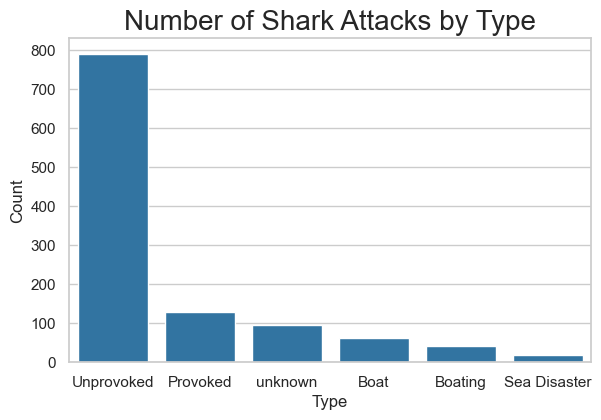

In [66]:
fig, ax = plt.subplots(figsize=(6,4))
# Bar plot
sns.barplot(x=type_count.index, y=type_count.values, color='tab:blue')
# Axes labels and title
plt.title("Number of Shark Attacks by Type", size=20)
plt.ylabel("Count")
# Display
plt.show()

* The visualisation is concerning because most attacks recorded were unprovoked.

### Activity

In [24]:
activity_count = df['Activity'].value_counts()
activity_count.drop(index=['unknown'], inplace=True)
activity_count_top10 = activity_count.sort_values(ascending=False)[:10]
activity_count_top10

Activity
Surfing         179
Swimming        129
Fishing          93
Spearfishing     68
Bathing          32
Diving           24
Snorkeling       20
Pearl diving     19
Scuba diving     17
Wading           13
Name: count, dtype: int64

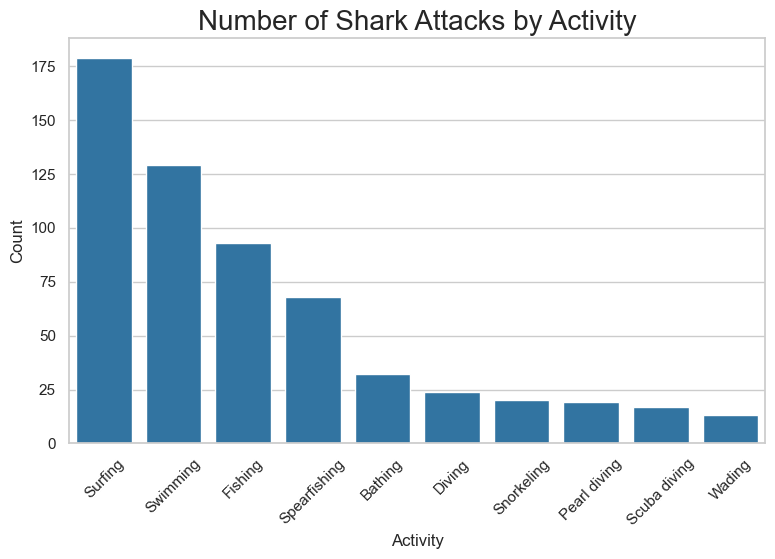

In [25]:
fig, ax = plt.subplots(figsize=(8,5))
# Bar plot
sns.barplot(x=activity_count_top10.index, y=activity_count_top10.values, color='tab:blue')
# Axes labels and title
plt.title("Number of Shark Attacks by Activity", size=20)
plt.xticks(rotation=45)
plt.ylabel("Count")
# Display
plt.show()

* The plot showed the top 10 activities related to shark attacks. Though some activities can be combined. For instance, different diving, pearl diving, and scuba diving present in the above plot can be combined as a single category, diving.
* Most attack records were associated with victims `surfing`.

### Area

In [32]:
df['Area'] = df['Area'].str.strip()
area_count = df['Area'].value_counts(dropna=False).sort_index()

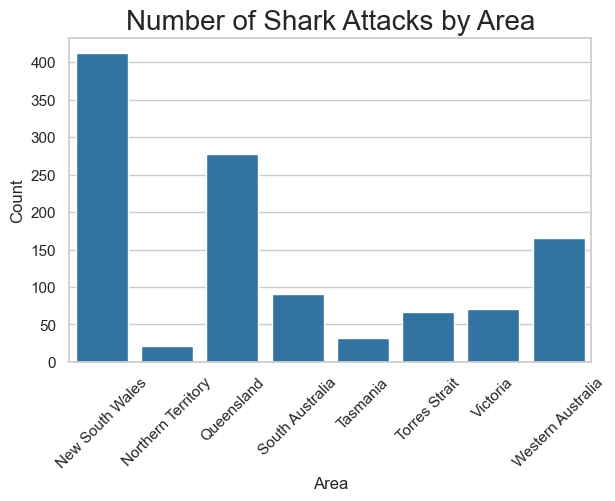

In [65]:
fig, ax = plt.subplots(figsize=(6,4))
# Bar plot
sns.barplot(x=area_count.index, y=area_count.values, color='tab:blue')
# Axes labels and title
plt.title("Number of Shark Attacks by Area", size=20)
plt.ylabel("Count")
plt.xticks(rotation=45)
# Display
plt.show()

* `New South Wales` has the most shark attack records among Australia.
* `Queensland` is the second and `Western Australia` is the third.

### Sex

In [42]:
df['Sex'] = df['Sex'].str.strip()
sex_count = df.loc[df['Sex']!='unknown','Sex'].value_counts().sort_index()

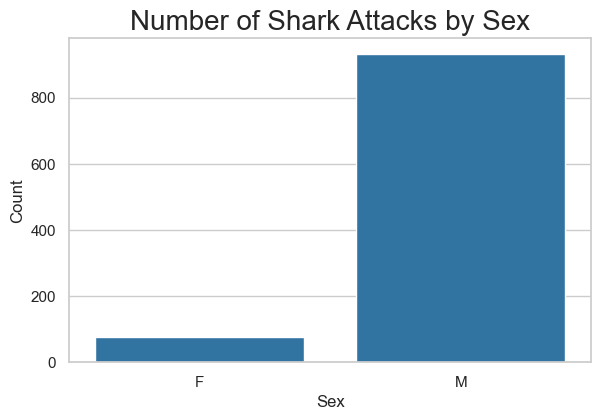

In [45]:
fig, ax = plt.subplots(figsize=(6,4))
# Bar plot
sns.barplot(x=sex_count.index, y=sex_count.values, color='tab:blue')
# Axes labels and title
plt.title("Number of Shark Attacks by Sex", size=20)
plt.ylabel("Count")
# Display
plt.show()

* `Male` is significantly dominant in the records.

### Age

In [62]:
age = df.loc[df['Age']!='unknown', 'Age'].astype(int)

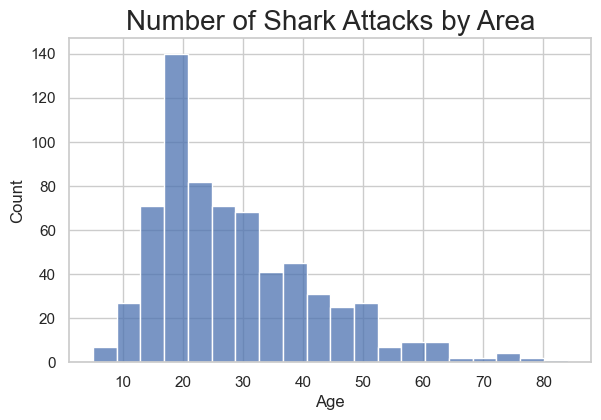

In [77]:
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(age)
plt.title("Number of Shark Attacks by Area", size=20)
plt.show()

* The distribution is slightly right-skewed.
* `Most victims` were around `20` of age. It could be explained by the higher population in this age range and bigger portion of people who go surfing and swimming are in this age range.